In [40]:
import torch
from diffusers import StableDiffusionPipeline
from transformers import CLIPTokenizer

import numpy as np
import random
from matplotlib import pyplot as plt

seed = 42
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
np.random.seed(seed)
random.seed(seed)

# Disable cuDNN benchmark to ensure deterministic behavior (slightly slower)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

In [53]:
unet

UNet2DConditionModel(
  (conv_in): Conv2d(4, 320, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (time_proj): Timesteps()
  (time_embedding): TimestepEmbedding(
    (linear_1): Linear(in_features=320, out_features=1280, bias=True)
    (act): SiLU()
    (linear_2): Linear(in_features=1280, out_features=1280, bias=True)
  )
  (down_blocks): ModuleList(
    (0): CrossAttnDownBlock2D(
      (attentions): ModuleList(
        (0-1): 2 x Transformer2DModel(
          (norm): GroupNorm(32, 320, eps=1e-06, affine=True)
          (proj_in): Conv2d(320, 320, kernel_size=(1, 1), stride=(1, 1))
          (transformer_blocks): ModuleList(
            (0): BasicTransformerBlock(
              (norm1): LayerNorm((320,), eps=1e-05, elementwise_affine=True)
              (attn1): Attention(
                (to_q): Linear(in_features=320, out_features=320, bias=False)
                (to_k): Linear(in_features=320, out_features=320, bias=False)
                (to_v): Linear(in_features=320, out_fe

In [41]:
# Load the pretrained model
model_id = "CompVis/stable-diffusion-v1-4"
device = "cuda" if torch.cuda.is_available() else "cpu"

# Load the pipeline
pipeline = StableDiffusionPipeline.from_pretrained(model_id).to(device)


# Extract the model components
tokenizer = pipeline.tokenizer
text_encoder = pipeline.text_encoder
unet = pipeline.unet
vae = pipeline.vae
scheduler = pipeline.scheduler

pipeline.scheduler.set_timesteps(50)
pipeline.scheduler.temperature = 0
pipeline.safety_checker=lambda images, clip_input: (images, [False] * len(images))


print(tokenizer)
print(text_encoder)
print(unet)
print(vae)
print(scheduler)


Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.
Loading pipeline components...: 100%|██████████| 7/7 [00:04<00:00,  1.70it/s]


OutOfMemoryError: CUDA out of memory. Tried to allocate 146.00 MiB. GPU 0 has a total capacity of 15.60 GiB of which 93.75 MiB is free. Including non-PyTorch memory, this process has 14.70 GiB memory in use. Of the allocated memory 14.27 GiB is allocated by PyTorch, and 147.93 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

/tmp/ipykernel_278483/2245761794.py:4: FutureWarning: Accessing config attribute `in_channels` directly via 'UNet2DConditionModel' object attribute is deprecated. Please access 'in_channels' over 'UNet2DConditionModel's config object instead, e.g. 'unet.config.in_channels'.
  latents_shape = (1, unet.in_channels, 512 // 8, 512 // 8)
  0%|          | 0/50 [00:00<?, ?it/s]

100%|██████████| 50/50 [00:04<00:00, 10.17it/s]


StableDiffusionPipelineOutput(images=[<PIL.Image.Image image mode=RGB size=512x512 at 0x7E822F8321D0>], nsfw_content_detected=[False])


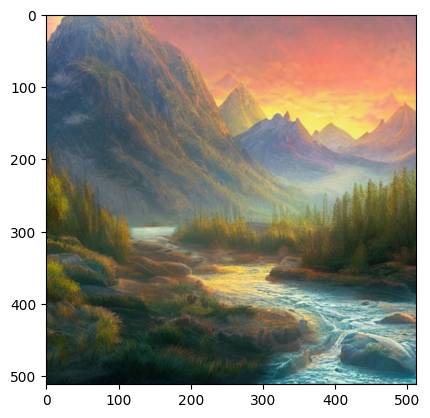

In [ ]:
# Define your prompt
prompt = "A fantasy landscape with mountains and a river during sunset"

latents_shape = (1, unet.in_channels, 512 // 8, 512 // 8)

# Generate random noise
latents = torch.randn(latents_shape, generator=torch.manual_seed(seed)).to(device)
latents = latents * scheduler.init_noise_sigma

# Generate image
with torch.no_grad():
    pipeline_result = pipeline(prompt, latents=latents, num_inference_steps=50, generator=torch.manual_seed(seed))

print(pipeline_result)

# Save the image
plt.imshow(pipeline_result.images[0])

In [ ]:
pipeline.scheduler

PNDMScheduler {
  "_class_name": "PNDMScheduler",
  "_diffusers_version": "0.30.3",
  "beta_end": 0.012,
  "beta_schedule": "scaled_linear",
  "beta_start": 0.00085,
  "clip_sample": false,
  "num_train_timesteps": 1000,
  "prediction_type": "epsilon",
  "set_alpha_to_one": false,
  "skip_prk_steps": true,
  "steps_offset": 1,
  "timestep_spacing": "leading",
  "trained_betas": null
}

In [ ]:
pipeline

StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.30.3",
  "_name_or_path": "CompVis/stable-diffusion-v1-4",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "__main__",
    "function"
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

# Step by Step

UNet2DConditionModel(
  (conv_in): Conv2d(4, 320, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (time_proj): Timesteps()
  (time_embedding): TimestepEmbedding(
    (linear_1): Linear(in_features=320, out_features=1280, bias=True)
    (act): SiLU()
    (linear_2): Linear(in_features=1280, out_features=1280, bias=True)
  )
  (down_blocks): ModuleList(
    (0): CrossAttnDownBlock2D(
      (attentions): ModuleList(
        (0-1): 2 x Transformer2DModel(
          (norm): GroupNorm(32, 320, eps=1e-06, affine=True)
          (proj_in): Conv2d(320, 320, kernel_size=(1, 1), stride=(1, 1))
          (transformer_blocks): ModuleList(
            (0): BasicTransformerBlock(
              (norm1): LayerNorm((320,), eps=1e-05, elementwise_affine=True)
              (attn1): Attention(
                (to_q): Linear(in_features=320, out_features=320, bias=False)
                (to_k): Linear(in_features=320, out_features=320, bias=False)
                (to_v): Linear(in_features=320, out_fe

In [ ]:
text_input = tokenizer(prompt, return_tensors="pt")

print(text_input)

# Move tensors to the same device as the model
text_input = {key: value.to(device) for key, value in text_input.items()}

# Get text embeddings
with torch.no_grad():
    text_embeddings = text_encoder(**text_input).last_hidden_state

print("Text Embeddings Shape:", text_embeddings.shape)


{'input_ids': tensor([[49406,   320,  5267,  5727,   593,  5873,   537,   320,  2473,  1590,
          3424, 49407]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}
Text Embeddings Shape: torch.Size([1, 12, 768])


In [46]:
scheduler.set_timesteps(50)
print(scheduler.timesteps)

tensor([981, 961, 961, 941, 921, 901, 881, 861, 841, 821, 801, 781, 761, 741,
        721, 701, 681, 661, 641, 621, 601, 581, 561, 541, 521, 501, 481, 461,
        441, 421, 401, 381, 361, 341, 321, 301, 281, 261, 241, 221, 201, 181,
        161, 141, 121, 101,  81,  61,  41,  21,   1])


In [47]:
# # Number of denoising steps
# num_steps = 50
# scheduler.set_timesteps(num_steps)

unet_outputs = []
all_latents = []
# Iterate through the scheduler timesteps to apply denoising
for t in scheduler.timesteps:
    # Predict the noise residual with the U-Net
    with torch.no_grad():
        noise_pred = unet(latents, t, encoder_hidden_states=text_embeddings).sample
    unet_outputs.append(noise_pred.detach().cpu())
    
    # Compute the previous noisy sample x_t -> x_t-1 using the scheduler
    latents = scheduler.step(noise_pred, t, latents).prev_sample
    all_latents.append(latents.detach().cpu())
    
unet_outputs = torch.stack(unet_outputs)
all_latents = torch.stack(all_latents)
print("All Latents Shape:", all_latents.shape)
print("All UNet Outputs Shape:", unet_outputs.shape)

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu! (when checking argument for argument mat1 in method wrapper_CUDA_addmm)

In [ ]:
# Decode the latents to get the image
with torch.no_grad():
    image = vae.decode(all_latents[-1].to(device) / scheduler.init_noise_sigma).sample

# Convert the image from [-1, 1] to [0, 1] range
# image = (image / 2 + 0.5).clamp(0, 1)
# rescale to 0, 255
image = (image - image.min()) / (image.max() - image.min())

# Permute and convert to numpy array for visualization
image = image.cpu().permute(0, 2, 3, 1).numpy()[0]

print("Final Image Shape:", image.shape)

plt.imshow(image)
plt.show()

OutOfMemoryError: CUDA out of memory. Tried to allocate 20.00 MiB. GPU 0 has a total capacity of 15.60 GiB of which 77.38 MiB is free. Including non-PyTorch memory, this process has 14.70 GiB memory in use. Of the allocated memory 14.28 GiB is allocated by PyTorch, and 139.93 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

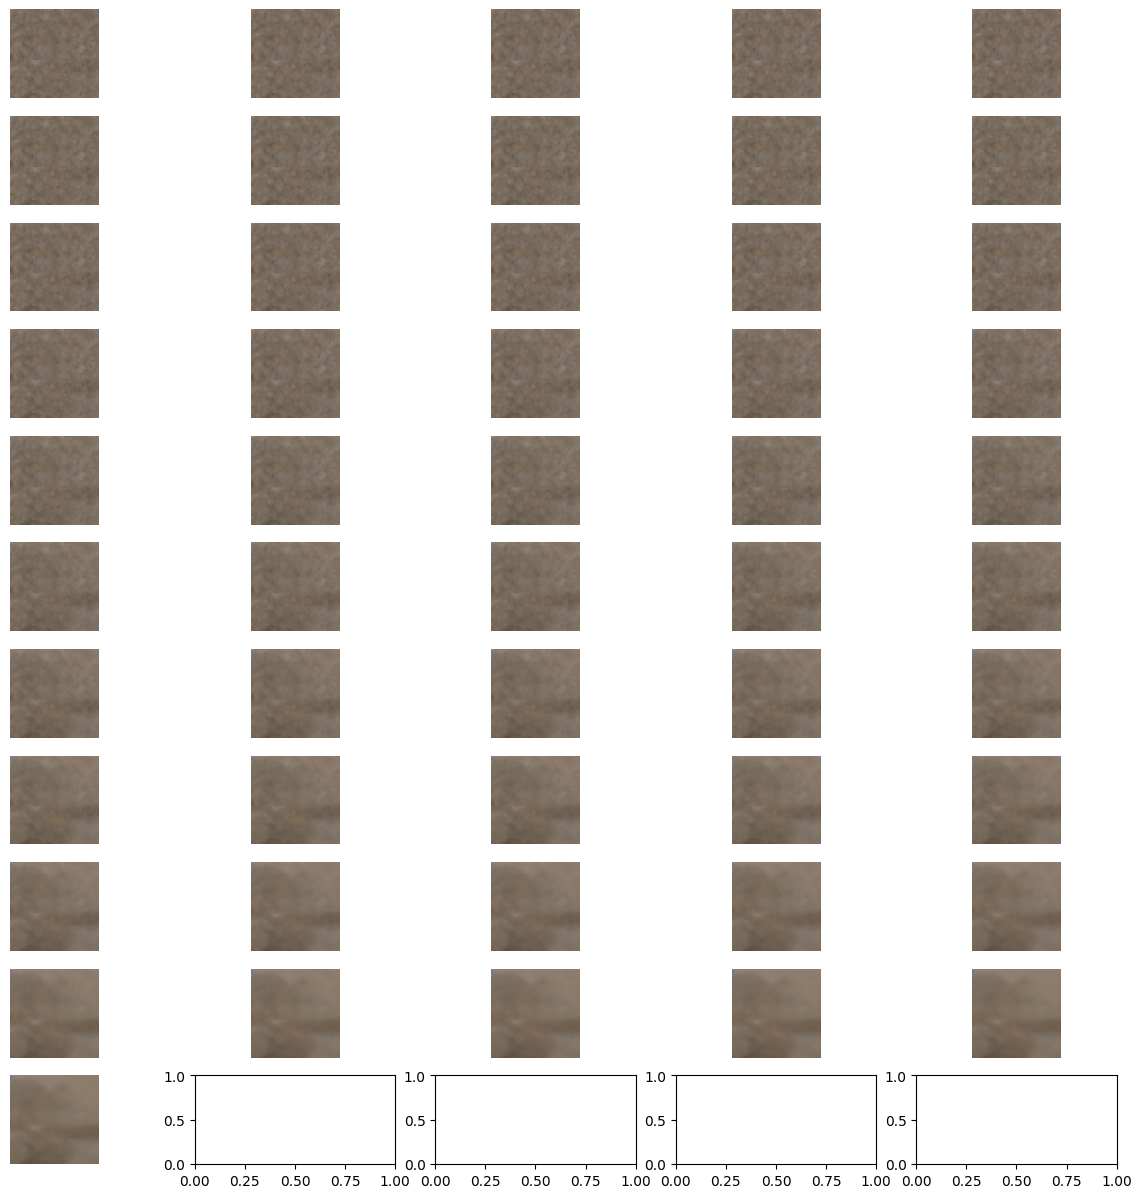

In [ ]:
# Number of images to display
num_images = len(all_latents)

cols = 5
rows = num_images // cols + 1
# Create a figure to display the images
fig, axes = plt.subplots(rows, cols, figsize=(15, 15))

# Decode each unet_output to get the image and display it
for i, latents in enumerate(all_latents):
    with torch.no_grad():
        image = vae.decode(latents.to(device) / scheduler.init_noise_sigma).sample

    # Convert the image from [-1, 1] to [0, 1] range
    image = (image / 2 + 0.5).clamp(0, 1)

    # Permute and convert to numpy array for visualization
    image = image.cpu().permute(0, 2, 3, 1).numpy()[0]

    # Display the image
    axes[i // cols, i % cols].imshow(image)
    axes[i // cols, i % cols].axis('off')

plt.show()
